In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mempersiapkan data frame yang akan digunakan
df = pd.read_csv('dataset_quiz.csv')
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [3]:
# Mengecek nilai null pada dataset quiz dengan bantuan sum()
df.isnull().sum()

id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

In [4]:
# MENGISI KOLOM NULL
modus_ketua = df['id_ketua'].mode()[0]
df['id_ketua'] = df['id_ketua'].fillna(modus_ketua)
modus_anggota1 = df['id_anggota1'].mode()[0]
df['id_anggota1'] = df['id_anggota1'].fillna(modus_anggota1)
modus_anggota2 = df['id_anggota2'].mode()[0]
df['id_anggota2'] = df['id_anggota2'].fillna(modus_anggota2)
modus_anggota3 = df['id_anggota3'].mode()[0]
df['id_anggota3'] = df['id_anggota3'].fillna(modus_anggota3)
modus_anggota4 = df['id_anggota4'].mode()[0]
df['id_anggota4'] = df['id_anggota4'].fillna(modus_anggota4)
modus_anggota5 = df['id_anggota5'].mode()[0]
df['id_anggota5'] = df['id_anggota5'].fillna(modus_anggota5)
# MENGECEK KEMBALI KOLOM NULL APAKAH SUDAH TERISI ATAU BELUM
df.isnull().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
id_anggota5           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

SOAL
1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)

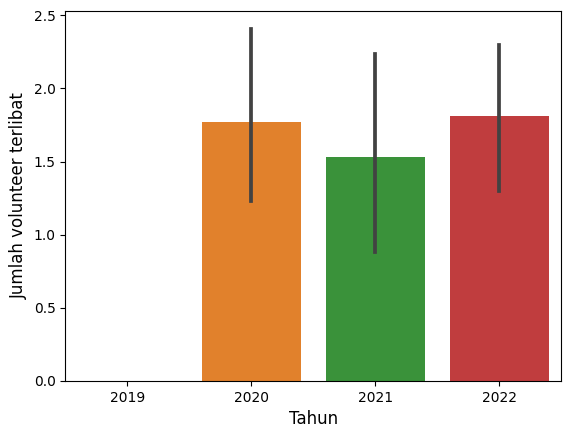

In [5]:
# JENIS VISUALISASI KE-1 (BAR PLOT)
import seaborn as sns

bp = sns.barplot(x ='tahun', y = 'jml_vltr_terlibat', data=df)
plt.xlabel('Tahun', size=12)
plt.ylabel('Jumlah volunteer terlibat', size=12)
plt.show()

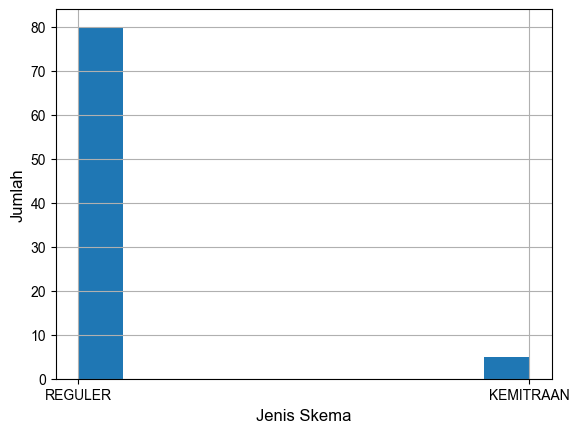

In [6]:
# JENIS VISUALISASI KE-2 (HISTOGRAM)

df['skema'].hist()
plt.xlabel('Jenis Skema', size=12)
plt.ylabel('Jumlah', size=12)
sns.set()

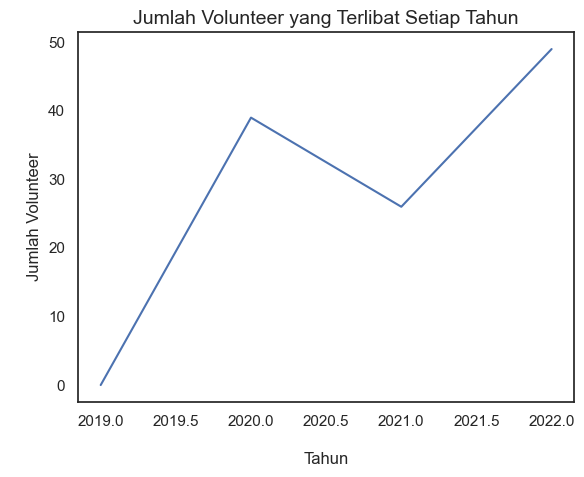

In [7]:
# JENIS VISUALISASI KE-3 (LINE PLOT)
plt.style.use('seaborn-ticks')

x = df['tahun'].unique()
y = df.groupby('tahun')['jml_vltr_terlibat'].sum()
plt.title('Jumlah Volunteer yang Terlibat Setiap Tahun', size=14)
plt.ylabel('\nJumlah Volunteer', size=12)
plt.xlabel('\nTahun', size=12)
plt.plot(x, y)
plt.show()

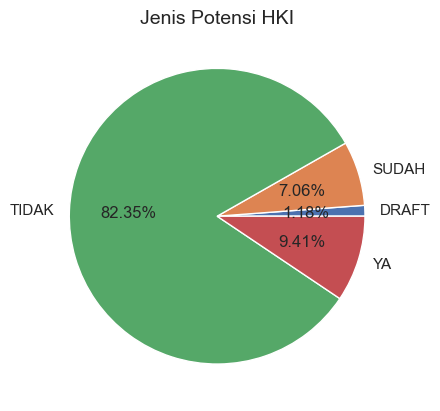

In [8]:
# JENIS VISUALISASI KE-4 (PIE CHART)

plt.style.use('seaborn-ticks')
data = df.groupby(['potensi_hki'])['potensi_hki'].count()
labels = df['potensi_hki'].unique()
labels.sort()
plt.pie(data, labels=labels, autopct='%1.2f%%')
plt.title('Jenis Potensi HKI', size=14)
plt.show()

<AxesSubplot:title={'center':'Jenis Iuaran Lain'}, ylabel='jenis_luaran_lain'>

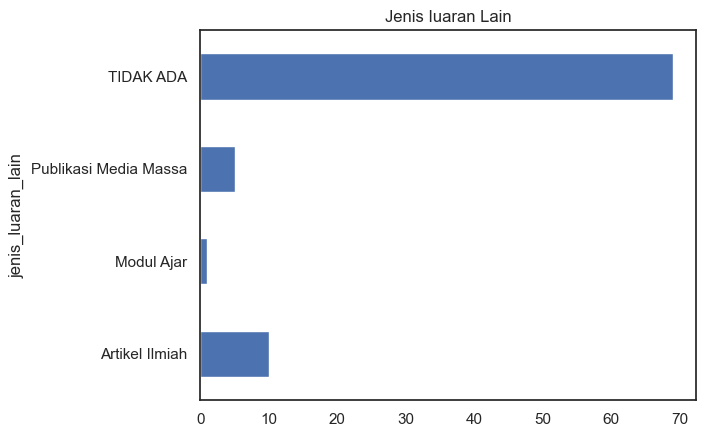

In [9]:
# JENIS VISUALISASI KE-4 (Bar Chart Horizontal)
df.groupby(['jenis_luaran_lain']).size().plot(
    kind='barh', title='Jenis Iuaran Lain')

2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)

In [10]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['keterlibatan_vltr'] = encode.fit_transform(df['keterlibatan_vltr'])
df['skema'] = encode.fit_transform(df['skema'])
df['luaran_hki'] = encode.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki'] = encode.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki'] = encode.fit_transform(df['potensi_hki'])
df['luaran_lain'] = encode.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain'] = encode.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain'] = encode.fit_transform(df['status_luaran_lain'])
df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,8812.0,0,0,2019,1,1,1,2,0,3,1
1,7214.0,7109.0,8402.0,7903.0,9202.0,8812.0,0,0,2019,1,1,1,2,0,3,1
2,5911.0,8201.0,8701.0,9101.0,9003.0,8812.0,0,0,2019,1,1,1,2,0,3,1
3,8402.0,7702.0,8602.0,8903.0,8903.0,8812.0,0,0,2019,1,1,1,2,0,3,1
4,8201.0,8305.0,5911.0,5903.0,8402.0,8812.0,0,0,2019,1,1,1,2,0,3,1


In [11]:
#Slice Dataframe
x = df.drop('keterlibatan_vltr', axis='columns')
y = df['keterlibatan_vltr']

#Cek jumlah fitur dan instance
x.shape

(85, 15)

In [12]:
#Splitting Data
from sklearn.model_selection import train_test_split

#Data main akan dipisahkan menjadi data train dan data validation 
x_main,x_test,y_main,y_test=train_test_split(x,y,test_size=0.1,stratify=y)

x_train,x_val,y_train,y_val=train_test_split(x_main,y_main,test_size=0.1,stratify=y_main)

3. Tentukan data validasi! (5 poin)

In [13]:
# Seleksi Fitur
X = df.iloc[:, 6:]
y = df['keterlibatan_vltr']

# Cek jumlah fitur dan instance
X.shape

(85, 10)

In [14]:
# Split data training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

In [15]:
# METODE KLASIFIKASI RANDOM FOREST

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 1.00
Test set accuracy: 1.0


In [16]:
# METODE KLASIFIKASI DECISSION TREE

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.00
Test set accuracy: 1.0


5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

In [17]:
def Luaran(row):  
    if row['tahun'] == 2020 :
        return 1
    else:
        return 0

df['Luaran'] = df.apply(lambda row: Luaran(row), axis=1)

print(df)

    id_ketua  id_anggota1  id_anggota2  id_anggota3  id_anggota4  id_anggota5  \
0     7206.0       7214.0       6211.0       8602.0       7801.0       8812.0   
1     7214.0       7109.0       8402.0       7903.0       9202.0       8812.0   
2     5911.0       8201.0       8701.0       9101.0       9003.0       8812.0   
3     8402.0       7702.0       8602.0       8903.0       8903.0       8812.0   
4     8201.0       8305.0       5911.0       5903.0       8402.0       8812.0   
..       ...          ...          ...          ...          ...          ...   
80    8803.0       8804.0       9102.0       8005.0       9303.0       8812.0   
81    6211.0       8901.0       9003.0       9303.0       9007.0       8812.0   
82    8601.0       8903.0       8703.0       8602.0       8901.0       8812.0   
83    8703.0       8601.0       9202.0       9102.0       6204.0       8812.0   
84    8102.0       7109.0       5903.0       7206.0       8903.0       8812.0   

    keterlibatan_vltr  jml_

In [18]:
from sklearn.svm import SVC
x = df[['skema']]
y = df['Luaran']
# Split data training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model SVM RBF tanpa tunning hyperparameter
svm_rbf = SVC(kernel='rbf')

# Fit ke model
svm_rbf.fit(X_train, y_train)

# Prediksi
y_pred_svm_rbf = svm_rbf.predict(X_test)

# Evaluasi akurasi testing data
acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

# Print hasil classification report
print(classification_report(y_test, y_pred_svm_rbf))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       0.00      0.00      0.00         4

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17



c:\Users\WINDOWS 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WINDOWS 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WINDOWS 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)

In [19]:
# PADA KLASIFIKASI DECISSION TREE

# Seleksi Fitur
X = df.iloc[:, 6:]
y = df['keterlibatan_vltr']

# Cek jumlah fitur dan instance
X.shape

(85, 11)

In [20]:
# Split data training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Training and Predicting Data
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [21]:
# CONFUSION MATRIX
from sklearn import metrics

conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[8, 0],
       [0, 9]], dtype=int64)

In [22]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

conf = get_confusion_matrix(y_test, y_preds)
conf

array([[8, 0],
       [0, 9]])

Text(0.5, 20.049999999999997, 'Predicted label')

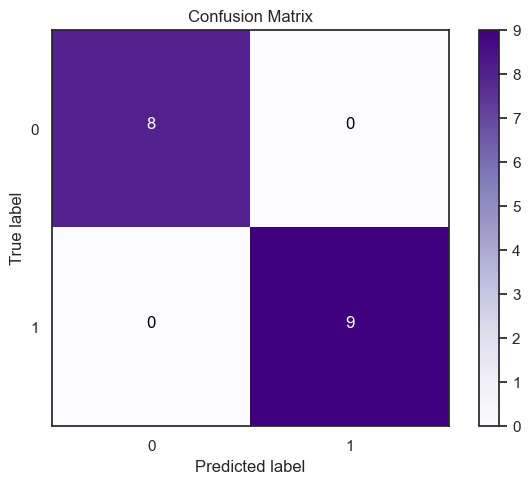

In [23]:
import itertools

classes = [0, 1]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [24]:
TP = true_pos = 9
TN = true_neg = 8
FP = false_pos = 0
FN = false_neg = 0
results = {}
# MENGHITUNG AKURASI
metric = "Accuracy"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} : {results[metric]: .3f}")

# MENGHTUNG PRESISI
metric = "Precision"
results[metric] = TP / (TP + FP)
print(f"{metric} : {results[metric]: .3f}")

# MENGHITUNG RECALL
metric = "Recall"
results[metric] = TP / (TP + FN)
print(f"{metric} : {results[metric]: .3f}")

# MENGHITUNG MATTHEW CORRELATION COEFFICIENT
metric = "Matthews correlation coefficient"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} : {results[metric]: .3f}")

Accuracy :  1.000
Precision :  1.000
Recall :  1.000
Matthews correlation coefficient :  1.000


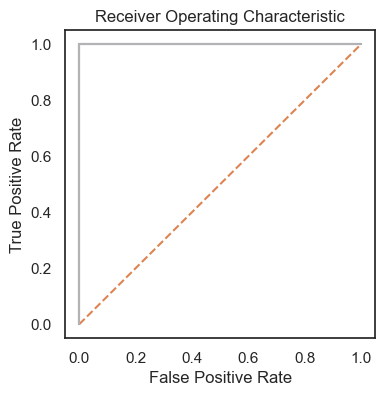

In [25]:
# ROC CURVE

from sklearn.metrics import roc_curve, roc_auc_score
y_proba = classifier.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate,threshold = roc_curve(y_test, y_proba)
plt.subplots(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
# ROC-AUC SCORE

auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

print('roc_auc_score : ', roc_auc_score(y_test, y_proba))

Scikit's ROC-AUC score of SVC model is  1.0000
roc_auc_score :  1.0


7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (20 poin)

In [27]:
from sklearn.model_selection import RepeatedKFold

# inisiasi repated k-fold
cv = RepeatedKFold(n_splits=4, n_repeats=3, random_state=42)

In [28]:
# GRID SEARCH MENGGUNAKAN DECISSION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

grid = GridSearchCV(dt, param_grid=params, cv=cv)

%timeit grid.fit(X, y)

score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

583 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'criterion': 'gini', 'max_depth': 5}


In [29]:
# RANDOM SEARCH MENGGUNAKAN DECISSION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier()

rs_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

random = RandomizedSearchCV(dt, rs_space, cv=cv, scoring='accuracy')

%timeit random.fit(X, y)

score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {random.best_params_}')
print('Score terbaik: '+str(random.best_score_))

487 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'max_depth': 10, 'criterion': 'entropy'}
Score terbaik: 1.0


In [30]:
# Exhausive Search menggunakan Decission Tree
model_dt_manual = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=10)

%timeit model_dt_manual.fit(X, y)

# Evaluasi dengan score
score = model_dt_manual.score(X,y)

print(f'Hasil evaluasi: {score}')

1.46 ms ± 37.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Hasil evaluasi: 1.0


In [31]:
# GRID SEARCH MENGGUNAKAN RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

grid = GridSearchCV(rf, param_grid=params, cv=cv)

%timeit grid.fit(X, y)

score = grid.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')

21.5 s ± 653 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'criterion': 'entropy', 'max_depth': 6}


In [32]:
# RANDOM SEARCH MENGGUNAKAN DECISSION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeClassifier()

rs_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5,11))
}

random = RandomizedSearchCV(dt, rs_space, cv=cv, scoring='accuracy')

%timeit random.fit(X, y)

score = random.score(X,y)

print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {random.best_params_}')
print('Score terbaik: '+str(random.best_score_))

505 ms ± 45.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'max_depth': 6, 'criterion': 'gini'}
Score terbaik: 0.996031746031746


In [33]:
# Exhausive Search menggunakan Random Forest
model_rf_manual = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=20, bootstrap=True)
%timeit model_rf_manual.fit(X, y)

# Evaluasi dengan score
score = model_rf_manual.score(X,y)

print(f'Hasil evaluasi: {score}')

66.7 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Hasil evaluasi: 0.9882352941176471


8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)

- Berdasarkan nomor 4

Test set accuracy: 1.00
Test set accuracy: 1.0


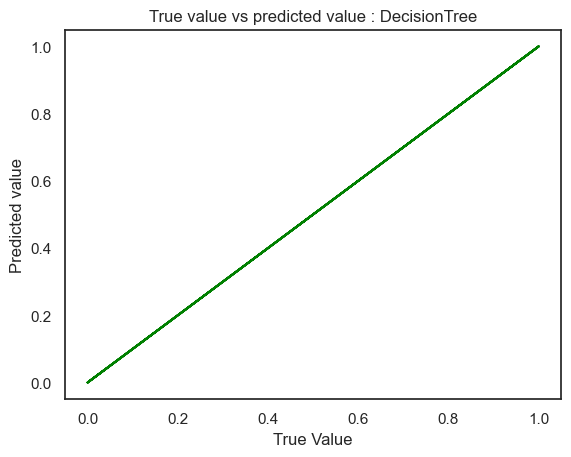

In [34]:
# DECISSION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

# Visualisasi : Plotting y_test dan y_pred
plt.plot(y_test, y_pred_dt, c = 'green')
plt.xlabel('True Value')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : DecisionTree')
plt.show()

Test set accuracy: 1.00
Test set accuracy: 1.0


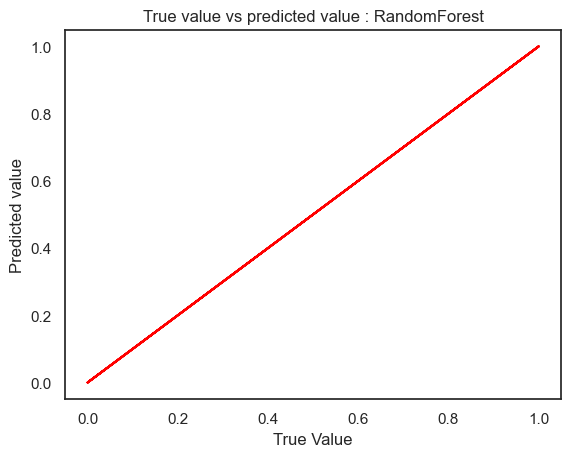

In [35]:
# RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

# Visualisasi : Plotting y_test dan y_pred
plt.plot(y_test, y_pred_rf, c = 'red')
plt.xlabel('True Value')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : RandomForest')
plt.show()

- Berdasarkan nomor 5

In [36]:
def Luaran(row):  
    if row['tahun'] == 2020 :
        return 1
    else:
        return 0

df['Luaran'] = df.apply(lambda row: Luaran(row), axis=1)

x = df[['skema']]
y = df['Luaran']

In [37]:
# Split data training dan testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

c:\Users\WINDOWS 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WINDOWS 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WINDOWS 10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       0.00      0.00      0.00         4

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17



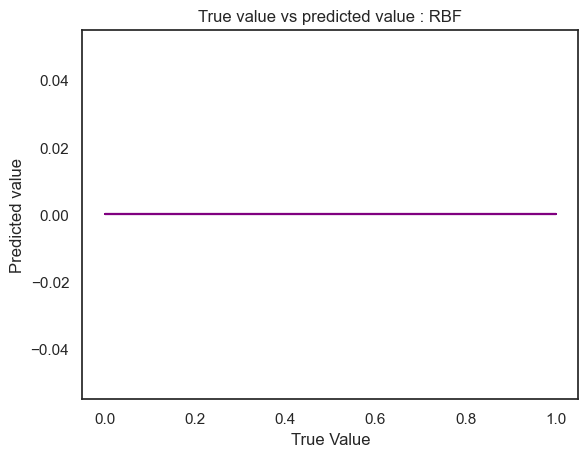

In [38]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train, y_train)

y_pred_svm_rbf = svm_rbf.predict(X_test)

acc_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

print(classification_report(y_test, y_pred_svm_rbf))

# Visualisasi : Plotting y_test dan y_pred
plt.plot(y_test, y_pred_svm_rbf, c = 'purple')
plt.xlabel('True Value')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : RBF')
plt.show()